# Trends in use of prescription stimulants in the United States and Territories, 2006 to 2016

I chose to do my reproducibility project with a graph from [this](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206100) paper. I scraped the data from a pdf file, and filtered the lines for the lines that I wanted. It took a little bit longer than I had hoped. I can't get the colors or legends to match, but I learned a lot!

In [1]:
library(pdftools)
library(tidyverse)
library(usmap)
download.file("https://www.deadiversion.usdoj.gov/arcos/retail_drug_summary/report_yr_2016.pdf",
              "./report_yr_2016.pdf")
text <- pdf_text("./report_yr_2016.pdf")

lines <- text[527:558] %>%
  strsplit("\n") %>%
  unlist() %>%
  strsplit("\\s{2,}")

d_out <- as.tibble(as.data.frame(matrix(ncol = 3, nrow = 0, data = NA)))
names(d_out) <- c("state", "grams_per_capita", "Drug")
for(i in 1:length(lines)) {
  if (any(grepl("DRUG NAME:", lines[[i]]))) {
    cur_drug <- strsplit(lines[[i]][3], ":")[[1]][2]
    next
  }
  
  if (any(grepl(":", lines[[i]])) | 
      any(grep("CUMULATIVE DISTRIBUTION", lines[[i]])) |
      lines[[i]][2] == "RANK")
    next
  
  # get the state name without the number
  state_name <- strsplit(lines[[i]][2], " ")[[1]]
  state_name <- paste(state_name[2:length(state_name)], collapse = " ")
  
  # grams per capita
  amount_drug <- lines[[i]][5]
  amount_drug <- gsub(",", "", amount_drug[length(amount_drug)]) %>% as.numeric()
  
  d_out <- d_out %>%
    add_row(state = state_name, grams_per_capita = amount_drug, Drug = cur_drug)
}


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


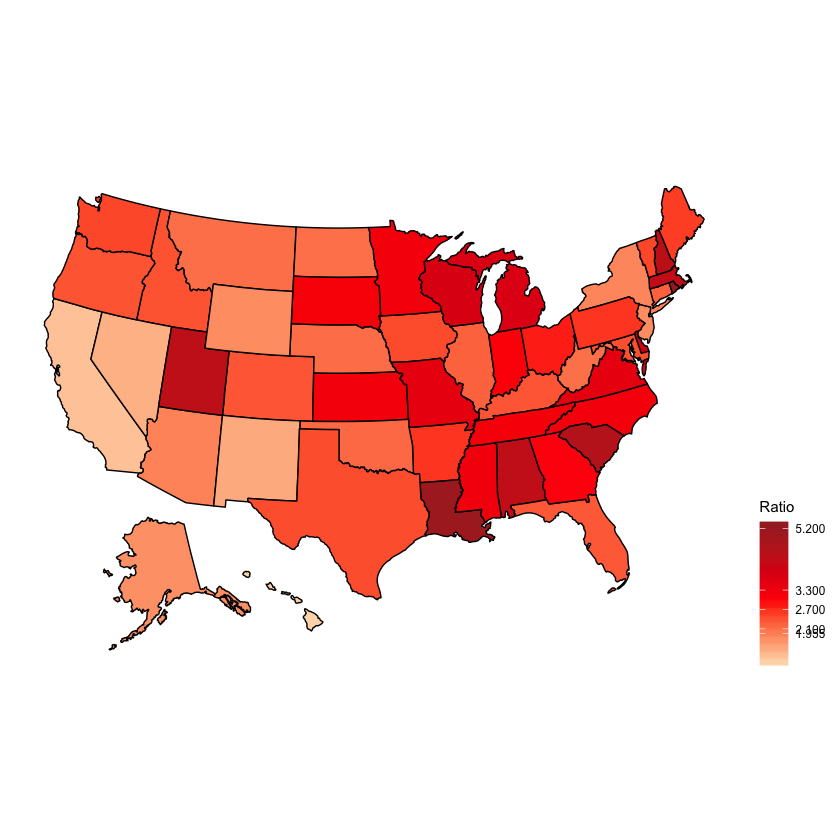

In [2]:
# Plotting amphetamine
d_amphetamine <- 
  d_out %>%
  filter(Drug == "AMPHETAMINE") %>%
  mutate(ratio = grams_per_capita/min(grams_per_capita)/1250*5)

plot_usmap(data = d_amphetamine, values = "ratio") + 
  scale_fill_gradient2(name = "Ratio", low = "cornsilk", mid = "red", high = "brown", 
                        midpoint = 3, aesthetics = "fill",
                        breaks = c(0.005, 1.955, 2.1, 2.7, 3.3, 5.2)) + 
  theme(legend.position = "right")

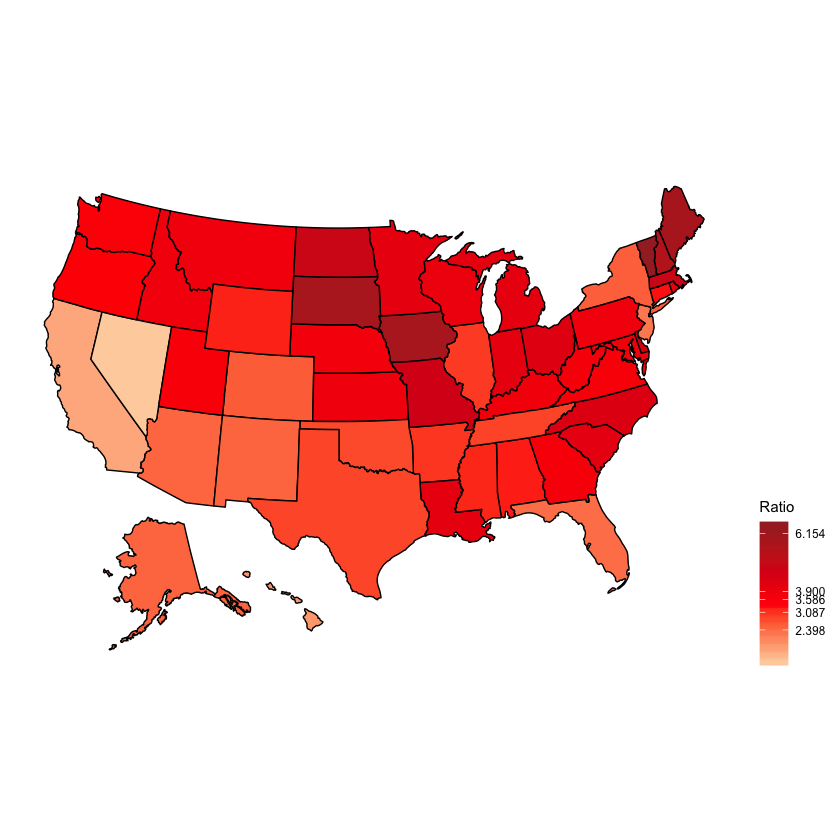

In [3]:
# Plotting methylphenidate
d_methylphenidate <- 
  d_out %>%
  filter(map_lgl(Drug, ~grepl("METHYLPHENIDATE", .x))) %>%
  mutate(ratio = grams_per_capita/min(grams_per_capita)/500*6)

plot_usmap(data = d_methylphenidate, values = "ratio") + 
  scale_fill_gradient2(name = "Ratio", low = "cornsilk", mid = "red", high = "brown", 
                      midpoint = 3.5, aesthetics = "fill",
                        breaks = c(0.014, 2.398, 3.087, 3.586, 3.9, 6.154)) + 
  theme(legend.position = "right")

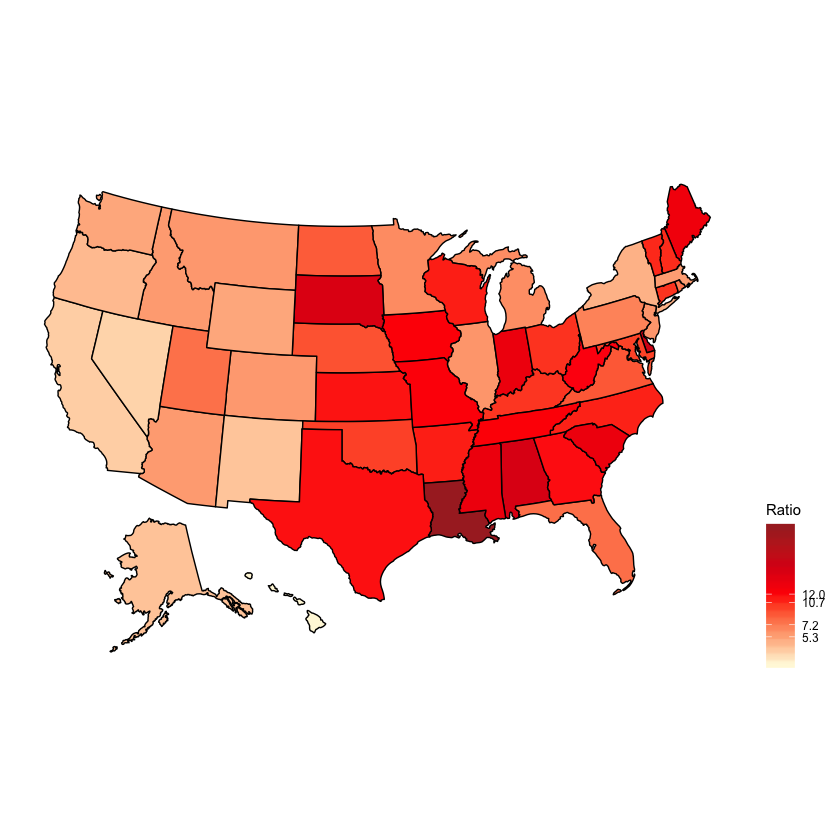

In [4]:
# Plotting lisdexamfetamine
d_lisdexamfetamine <- 
  d_out %>%
  filter(map_lgl(Drug, ~grepl("LISDEXAMFETAMINE", .x))) %>%
  mutate(ratio = grams_per_capita/min(grams_per_capita)/160*22)

plot_usmap(data = d_lisdexamfetamine, values = "ratio") + 
  scale_colour_gradient2(name = "Ratio", low = "cornsilk", mid = "red", high = "brown", 
                      midpoint = 12, aesthetics = "fill",
                      breaks = c(0, 5.3, 7.2, 10.7, 12.0, 22.7)) +
  theme(legend.position = "right")